In [1]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
np.random.seed(2)

In [16]:
data = pd.read_csv('training_set.csv', index_col = 0)

## Data exploration

In [17]:
data.head()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
202709,134454.0,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,0.474746,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,21.90,0
129171,78980.0,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,-0.466060,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,2.99,0
73775,55273.0,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,-0.982280,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,7.08,0
31569,36417.0,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,0.258104,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,7.68,0
250571,154977.0,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,0.980549,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,49.00,0


In [25]:
from scipy.stats import pearsonr
cor, _ = pearsonr(data['Time'], data['Class'])
print(cor)

-0.011607508646451247


## Pre-processing

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Mud'] = scaler.fit_transform(data[['Mud']])
#data = data.drop(['Amount'],axis=1)

In [19]:
data.head()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
202709,134454.0,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,0.474746,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,-0.266795,0
129171,78980.0,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,-0.466060,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,-0.342633,0
73775,55273.0,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,-0.982280,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,-0.326231,0
31569,36417.0,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,0.258104,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,-0.323824,0
250571,154977.0,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,0.980549,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,-0.158111,0


In [26]:
data = data.drop(['Time'],axis=1)
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
202709,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,0.474746,-0.296228,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,-0.266795,0
129171,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,-0.466060,-0.018774,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,-0.342633,0
73775,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,-0.982280,0.843286,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,-0.326231,0
31569,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,0.258104,-0.155770,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,-0.323824,0
250571,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,0.980549,-0.449475,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,-0.158111,0


In [27]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [28]:
y.head(10)

,Class
202709,0
129171,0
73775,0
31569,0
250571,0
101039,0
65697,0
31776,0
260469,0
11492,0


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
y_np = np.array(y)
X_np = np.array(X)

In [78]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [119]:
def confusion_matrix(y_pred, y_np, str):
    s = y_pred.shape
    pred = np.zeros((2, 2))
    lis = []
    for i in range(1, s[0]):
      pred[int(y_pred[i].round()), y_np[i]] = pred[int(y_pred[i].round()), y_np[i]]+1
    pred = np.transpose(pred)
    fig, ap = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(pred, annot=True, cmap='Blues', ax = ap, fmt = '1')

    ax.set_title('Confusion Matrix ' + str +'\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['\n0', '\n1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Decision tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.ravel())

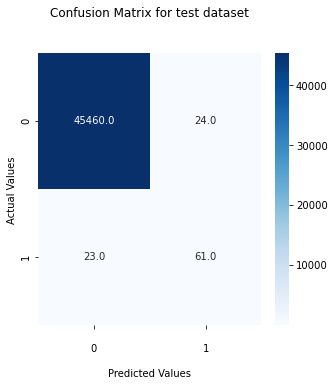

In [94]:
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_pred, y_test, 'for test dataset')

In [95]:
print('Test score:', decision_tree.score(X_test,y_test))

Test score: 0.9989685970725712


D:\ProgramData\Anaconda3\envs\tf_gpu2\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


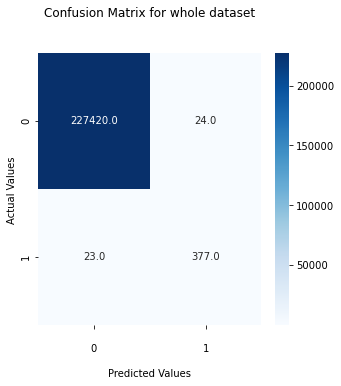

In [96]:
y_pred = decision_tree.predict(X)
confusion_matrix(y_pred, y_np, 'for whole dataset')

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier()

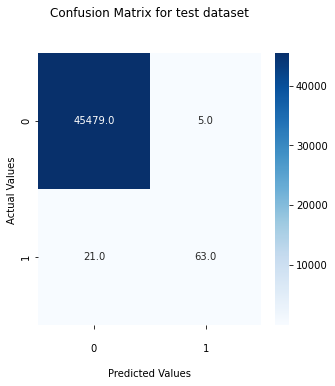

In [98]:
y_pred = random_forest.predict(X_test)
confusion_matrix(y_pred, y_test, 'for test dataset')

In [97]:
print('Test score:', random_forest.score(X_test,y_test))

Test score: 0.9994294366784436


D:\ProgramData\Anaconda3\envs\tf_gpu2\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


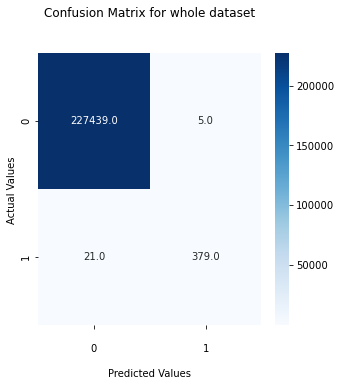

In [99]:
y_pred = random_forest.predict(X)
confusion_matrix(y_pred, y_np, 'for whole dataset')

## XGBoost

In [101]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[12:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

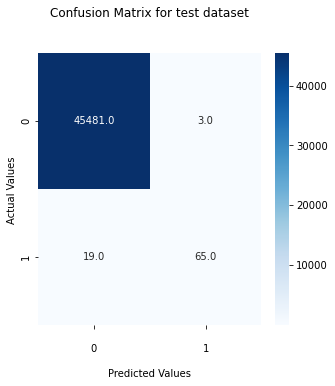

In [104]:
y_pred = classifier.predict(X_test)
confusion_matrix(y_pred, y_test, 'for test dataset')

In [105]:
print('Test score:', classifier.score(X_test,y_test))

Test score: 0.9995172156509908


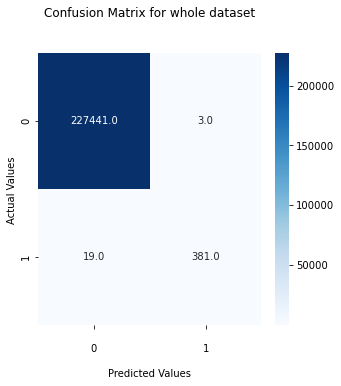

In [106]:
y_pred = classifier.predict(X)
confusion_matrix(y_pred, y_np, 'for whole dataset')

## Deep neural network

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [109]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

## Training

In [111]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
12152/12152 [==============================] - 76s 6ms/step - loss: 0.0089 - accuracy: 0.9987
Epoch 2/5
12152/12152 [==============================] - 67s 6ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 3/5
12152/12152 [==============================] - 66s 5ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
12152/12152 [==============================] - 69s 6ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/5
12152/12152 [==============================] - 63s 5ms/step - loss: 0.0032 - accuracy: 0.9994


In [112]:
score = model.evaluate(X_test, y_test)

1425/1425 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9993


In [113]:
print(score)

[0.00426381966099143, 0.999275803565979]


In [118]:
y_pred.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

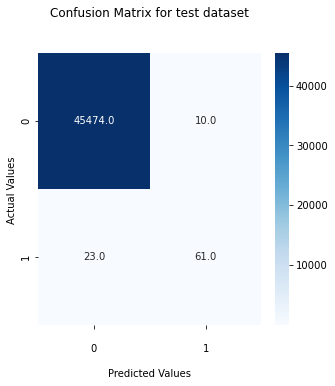

In [120]:
y_pred = model.predict(X_test)
confusion_matrix(y_pred, y_test, 'for test dataset')

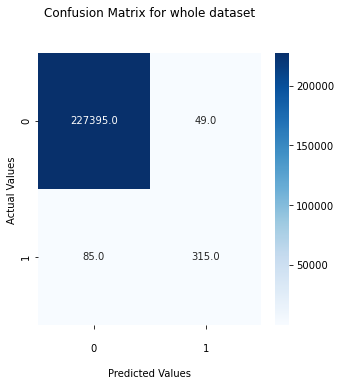

In [121]:
y_pred = model.predict(X)
confusion_matrix(y_pred, y_np, 'for whole dataset')